## The fourth Lab-assignment (07/26/2022 11:59'AM' - 07/29/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (10 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?


In [120]:
# Your answer here (code + explanation):
import zipfile
zip = zipfile.ZipFile("preprocessed_cases[cases_29404].zip")

##1.1

In [121]:
ziplist=zip.namelist()
cat=[]
for i in ziplist:
  x=i.split('/')
  cat.append(x[1])
len(set(cat))
  

77

##1.2

In [122]:
for i in range(len(set(cat))+1):
  num=[]
  for j in ziplist:
    x=j.split('/')
    if x[1]==i:
      num.append(x[2])
    cat.append(x[1])
len(set(num))

0

Question 2 (40 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:


# Your answer here (code + explanation):








In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("lab-assignment-04-student-performance.csv")
data.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,...,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,...,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,...,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,...,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,...,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


##2.1

In [124]:
for i in data.columns:       #getting the column descriptions
  print('Column Name: ',i,'\nDescription: \n',data[i].describe(),'\nNumber of Rows: ',len(data[i]),'\nUnique Elements: ',data[i].unique(),'\nElements Frequency: \n',data[i].value_counts())


Column Name:  ge 
Description: 
 count     131
unique      2
top         M
freq       72
Name: ge, dtype: object 
Number of Rows:  131 
Unique Elements:  ['F' 'M'] 
Elements Frequency: 
 M    72
F    59
Name: ge, dtype: int64
Column Name:  cst 
Description: 
 count     131
unique      5
top       OBC
freq       57
Name: cst, dtype: object 
Number of Rows:  131 
Unique Elements:  ['G' 'OBC' 'MOBC' 'ST' 'SC'] 
Elements Frequency: 
 OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64
Column Name:  tnp 
Description: 
 count      131
unique       4
top       Good
freq        59
Name: tnp, dtype: object 
Number of Rows:  131 
Unique Elements:  ['Good' 'Vg' 'Pass' 'Best'] 
Elements Frequency: 
 Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64
Column Name:  twp 
Description: 
 count      131
unique       4
top       Good
freq        65
Name: twp, dtype: object 
Number of Rows:  131 
Unique Elements:  ['Good' 'Vg' 'Pass' 'Best'] 
Elements Frequency:

##2.2

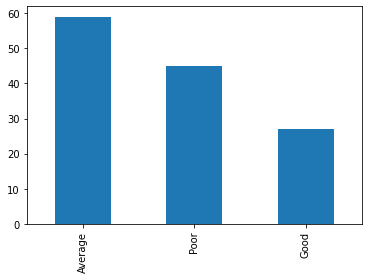

In [125]:
data['sh'].value_counts().plot(kind = 'bar')   #generating barchart for value counts in sh column

In [126]:
#Label Encoding the Categorical variables to Numerical values
data['ge']=data['ge'].map({"M":1,"F":0})
data['arr']=data['arr'].map({"N":1,"Y":0})
data['ls']=data['ls'].map({"V":1,"T":0})
data['as']=data['as'].map({"Paid":1,"Free":0})
data['ss']=data['ss'].map({"Govt":1,"Private":0})
data['sh']=data.sh.map({"Poor": 0, "Average": 1,"Good":2})
data['tnp']=data.tnp.map({"Fail": 0, "Pass": 1, "Good": 2, "Vg": 3,"Best": 4 })
data['twp']=data.twp.map({"Fail": 0, "Pass": 1, "Good": 2, "Vg": 3,"Best": 4 })
data['iap']=data.iap.map({"Fail": 0, "Pass": 1, "Good": 2, "Vg": 3,"Best": 4 })
data['esp']=data.esp.map({"Fail": 0, "Pass": 1, "Good": 2, "Vg": 3,"Best": 4 })
data['atd']=data.atd.map({"Poor": 0, "Average": 1,"Good":2})
data['fs']=data.fs.map({"Small":0,"Average":1,"Large":2})
data['nf']=data.nf.map({"Small":0,"Average":1,"Large":2})
data['tt']=data.tt.map({"Small":0,"Average":1,"Large":2})

##2.3

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


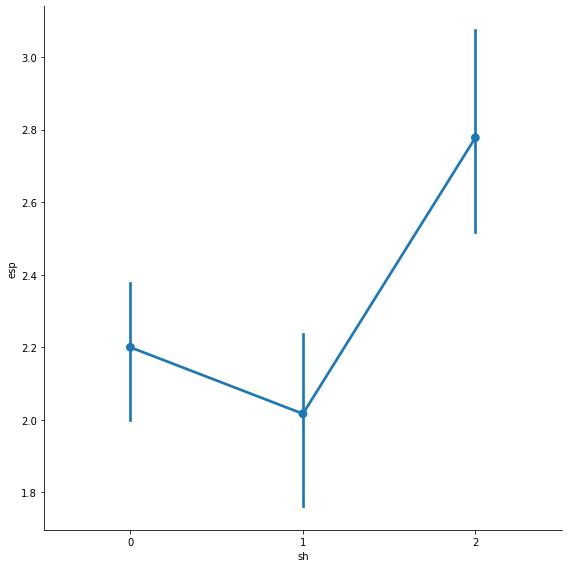

In [127]:
sns.factorplot(x='sh',y='esp',data=data,size=8)  #generating factorplot using sh and esp columns

##2.4

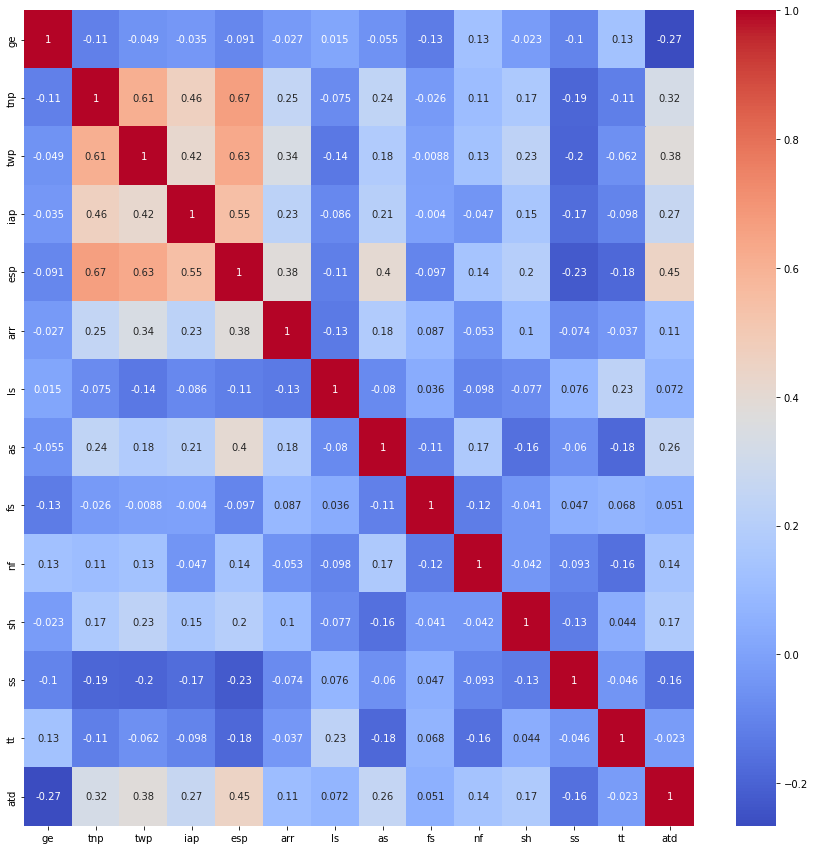

In [128]:
plt.figure(figsize=(15,15)) 
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')  #creating heatmap using corr() and heatmap() functions